<a href="https://colab.research.google.com/github/TranPhamTrungHy/Final_Project/blob/main/Diabetes_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:

#tạo file .npy cho ảnh dùng để train
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/AI/Eye/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('yes '):
    output = 1
  if file.startswith('no '):
    output = 2
  img =load_img(folder+file,target_size=(300,400))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('/content/drive/MyDrive/AI/eye test/diabetes_photo.npy',photos)
save('/content/drive/MyDrive/AI/eye test/diabetes_label.npy',labels)

(200, 300, 400, 3) (200,)


In [76]:
# gán các biến đầu vào và đầu ra của train và test 
import numpy as np
from sklearn.model_selection import train_test_split

X = np.load('/content/drive/MyDrive/AI/eye test/diabetes_photo.npy')
y = np.load('/content/drive/MyDrive/AI/eye test/diabetes_label.npy')
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 300, 400, 3)
(160,)
(40, 300, 400, 3)
(40,)


In [77]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train,3)
y_test = to_categorical(y_test,3)

In [78]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam


#32 lan tich chap
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(300,400,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#64 lan tich chap
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#128 lan tich chap
model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#256 lan tich chap
model.add(Conv2D(256,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#512 lan tich chap
model.add(Conv2D(512,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(3,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,batch_size=11,epochs = 50,verbose = 1,validation_data=(x_test, y_test))

test_loss,test_acc = model.evaluate(x_test,y_test)
print('Mất mát:',round(test_loss,3))
print('Độ chính xác:',round(test_acc*100,3),'%')

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_90 (Conv2D)          (None, 300, 400, 32)      896       
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 150, 200, 32)     0         
 g2D)                                                            
                                                                 
 dropout_108 (Dropout)       (None, 150, 200, 32)      0         
                                                                 
 conv2d_91 (Conv2D)          (None, 150, 200, 64)      18496     
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 75, 100, 64)      0         
 g2D)                                                            
                                                                 
 dropout_109 (Dropout)       (None, 75, 100, 64)     

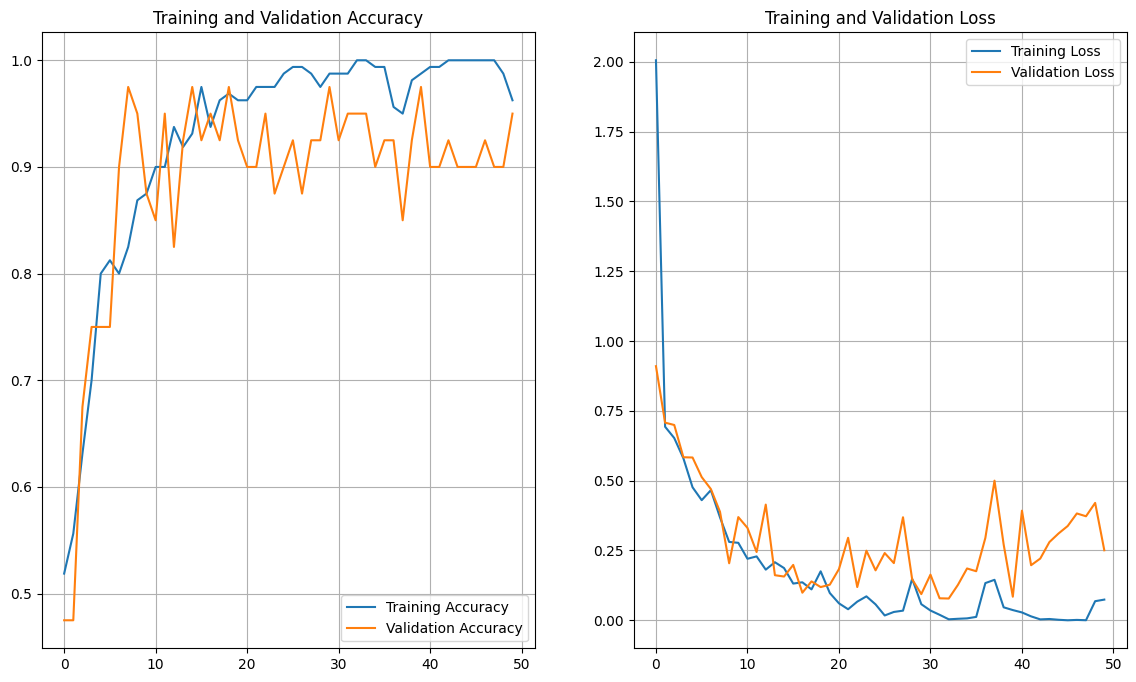

In [79]:
import numpy as np 
import matplotlib.pyplot as plt
# Lấy giá trị accuracy của tập huấn luyện và tập validation
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']

# Lấy giá trị loss của tập huấn luyện và tập validation
loss = train.history['loss']
val_loss = train.history['val_loss']

# Tạo biểu đồ
epochs_range = range(len(acc))
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range,val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()

1/1 [==============================] - 0s 23ms/step


'You may have diabetes'

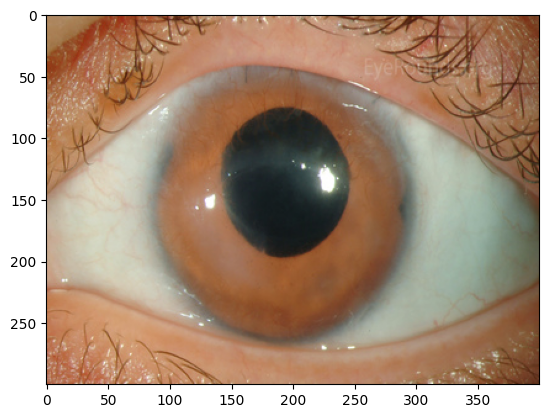

In [101]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
from keras.models import load_model
disease = {1: 'You may have diabetes',2:'You are well' }
img = load_img("/content/drive/MyDrive/AI/eye test/có (1).jpg",target_size=(300,400))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,300,400,3)
img = img.astype('float32')
img = img/255
result  = np.argmax(model.predict(img),axis=1)
disease[result[0]]

In [97]:
model.save('/content/drive/MyDrive/AI/eye test/diabetes.h5')

1/1 [==============================] - 0s 137ms/step


'You are well'

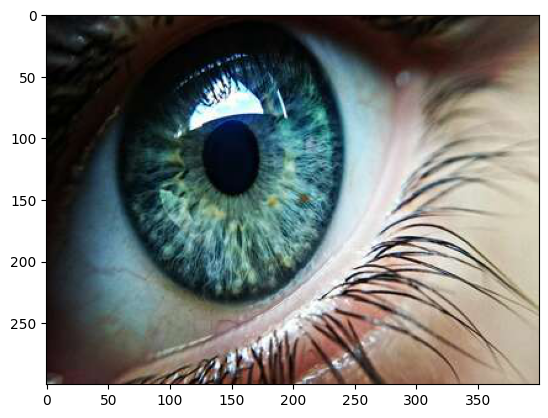

In [100]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
from keras.models import load_model
disease = {1: 'You may have diabetes',2:'You are well' }
img = load_img("/content/drive/MyDrive/AI/eye test/không (6).jpg",target_size=(300,400))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,300,400,3)
img = img.astype('float32')
img = img/255
model10 = load_model('/content/drive/MyDrive/AI/eye test/diabetes.h5')
result  = np.argmax(model10.predict(img),axis=1)
disease[result[0]]